In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
 df.shape

(28242, 7)

In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.info

<bound method DataFrame.info of            Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0           

In [10]:
df.duplicated().sum()

np.int64(2310)

In [11]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [15]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [16]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
        

In [19]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [20]:
to_drop

Index([], dtype='int64')

In [21]:
df = df.drop(to_drop)

<Axes: xlabel='count', ylabel='Area'>

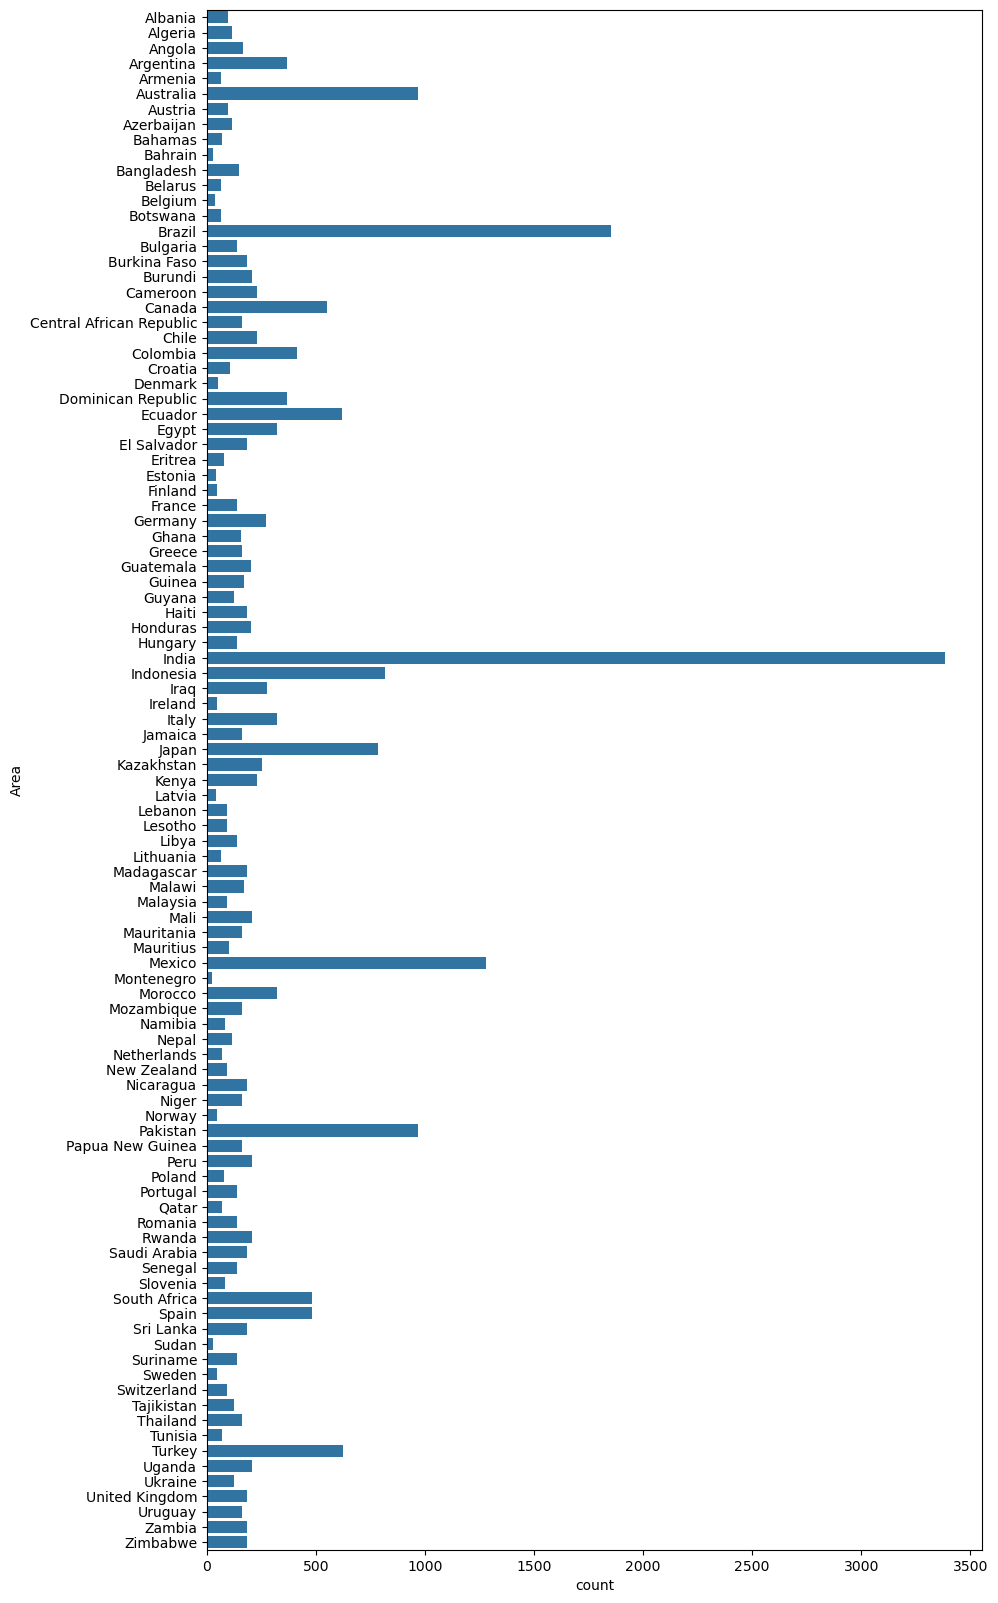

In [36]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [41]:
country = df['Area'].unique()
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [44]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

<Axes: >

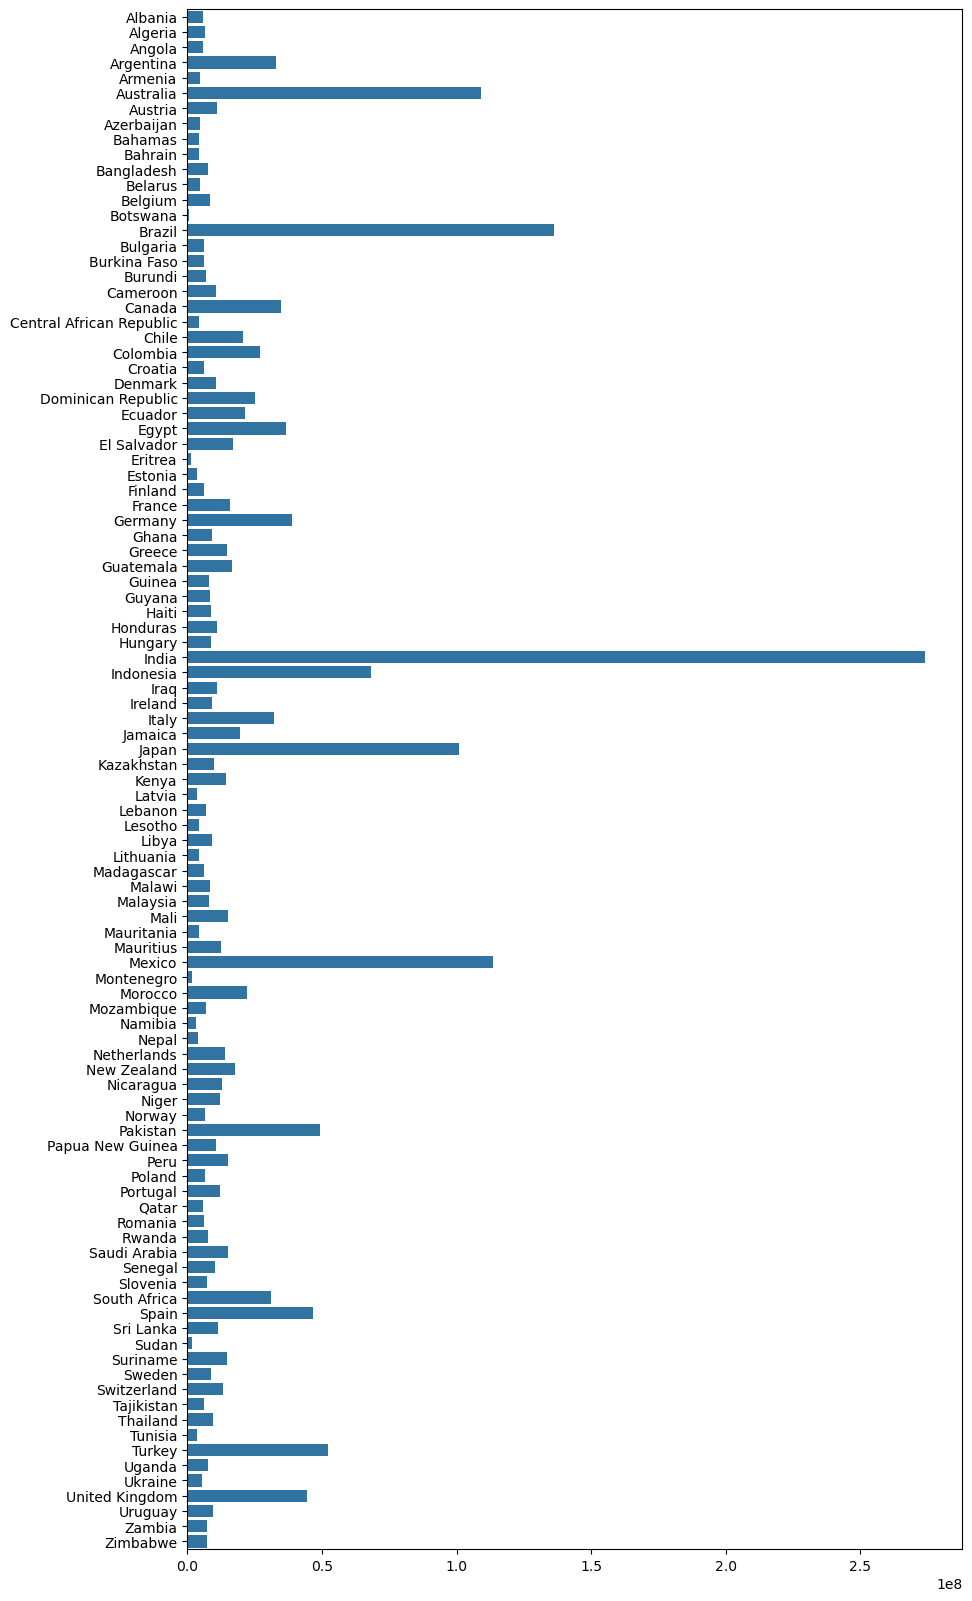

In [55]:
plt.figure(figsize=(10,20))
sns.barplot(y=country, x=yield_per_country)

In [56]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


<Axes: xlabel='count', ylabel='Item'>

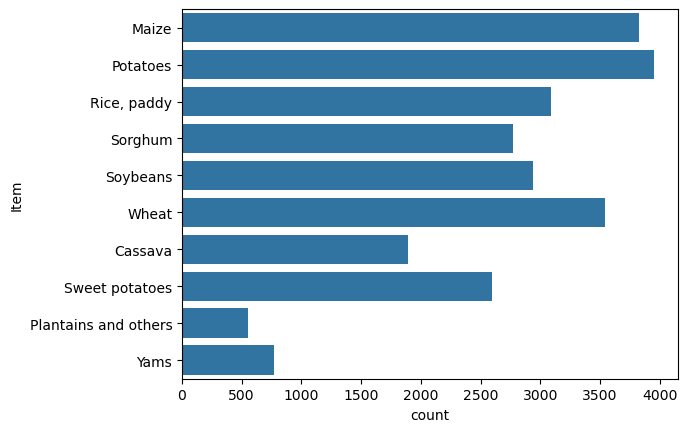

In [57]:
sns.countplot(y=df['Item'])

In [58]:
crops = df['Item'].unique()
len(crops)

10

In [60]:
yield_per_item = []
for crop in crops:
    yield_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [61]:
yield_per_item

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

<Axes: >

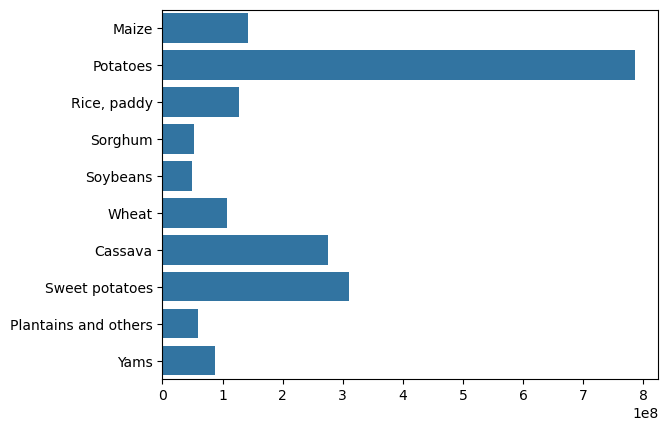

In [63]:
sns.barplot(y=crops, x=yield_per_item)

In [64]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [65]:
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

In [66]:
df = df[col]

In [67]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [71]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [77]:
from sklearn.compose import ColumnTransformer

In [79]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
X_train.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum


In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder', ohe,[4,5]),
        ('standrization', scaler, [0,1,2,3])
    ],
    remainder='passthrough'
)

In [87]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [89]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [90]:
X_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [92]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
     'Knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(X_train_dummy, Y_train)
    y_pred = mod.predict(X_test_dummy)
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred)} and with score {r2_score(y_test, y_pred)}")
    
    
    
    

lr MSE: 1821709183.8432944 and with score 0.7486566542745932


C:\Users\DRECT BUY\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.44141, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE: 1822234158.2996287 and with score 0.7485842229351424
rg MSE: 1822538383.1318312 and with score 0.7485422486793958
Knr MSE: 128210171.76440331 and with score 0.9823106927202787
dtr MSE: 172725997.05475226 and with score 0.9761687922646863


In [102]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, Y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 128507.])

In [111]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])
    transform_Features = preprocessor.transform(features)
    result =dtr.predict(transform_Features).reshape(1,-1)
    return result


In [122]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp = 23.23
Area = 'Saudi Arabia'
Item = 'Sorghum'

In [123]:
print(prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item))

[[13384.]]


C:\Users\DRECT BUY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\DRECT BUY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
import pickle

In [128]:
pickle.dump(dtr, open('dtr.pk', 'wb'))
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

In [129]:
!git status

fatal: not a git repository (or any of the parent directories): .git
